In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [76]:
books_df = pd.read_csv('Books.csv', encoding='latin1')
ratings_df = pd.read_csv('Ratings.csv', encoding='latin1')
users_df =  pd.read_csv('Users.csv', encoding='latin1')    

In [80]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [82]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [85]:
ratings_df.head(20)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


Here the ranging option being from 0 - 10 , we have 11 rating options . 10 being greater interest and zero means no rating.

as we observe ratings data has lot of 0 ratings, These 0 values indicate that the user did not rate that particular book. This situation makes our matrix sparse. 

In [88]:
# Calculate the maximum rating and find the unique ratings
print(ratings_df['Book-Rating'].max(), ratings_df['Book-Rating'].unique())

ratings_df.head(3)

10 [ 0  5  3  6  8  7 10  9  4  1  2]


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [90]:
print(f'Book dataframe\'s shape is {books_df.shape}')
print(f'Ratings\'s shape is:{ratings_df.shape}')
print(f'User\'s shape is :{users_df.shape}')

Book dataframe's shape is (271360, 8)
Ratings's shape is:(1149780, 3)
User's shape is :(278858, 3)


In [92]:
print('Null values in users dataframe are as follows:')
print('**********************************************')
print(users_df.isnull().sum())

Null values in users dataframe are as follows:
**********************************************
User-ID          0
Location         0
Age         110762
dtype: int64


In [94]:
print('Null values in books dataframe are as follows:')
print('**********************************************')
print(books_df.isnull().sum())

Null values in books dataframe are as follows:
**********************************************
ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [96]:
print('Null values in ratings dataframe are as follows:')
print('************************************************')
print(ratings_df.isnull().sum())

Null values in ratings dataframe are as follows:
************************************************
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [98]:
print('Number of duplicated values in books_df')
print('***************************************')

print(books_df.duplicated().sum())

Number of duplicated values in books_df
***************************************
0


In [99]:
print('Number of duplicated values in ratings_df')
print('***************************************')

print(ratings_df.duplicated().sum())

Number of duplicated values in ratings_df
***************************************
0


In [102]:
print('Number of duplicated values in users_df')
print('***************************************')

print(users_df.duplicated().sum())

Number of duplicated values in users_df
***************************************
0


In [104]:
# Calculate the count of ratings given by each user and store it in the 'ratings' Series
ratings = ratings_df['User-ID'].value_counts()
# Sort the 'ratings' Series in descending order based on the counts of user IDs
ratings.sort_values(ascending=False).head()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: User-ID, dtype: int64

In [106]:
display(books_df)
display(ratings_df)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [108]:
df = books_df.merge(ratings_df, on='ISBN')
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


Generating the User-IDs for users that rate more than n books

In [110]:
user_prune = df.groupby('User-ID')['Book-Rating'].count() > 100
user_and_rating = user_prune[user_prune].index
user_and_rating

Int64Index([   254,    507,    882,   1424,   1435,   1733,   1903,   2033,
              2110,   2276,
            ...
            275020, 275970, 276463, 276680, 277427, 277478, 277639, 278137,
            278188, 278418],
           dtype='int64', name='User-ID', length=1648)

we observe here that only 0.16% of users rated more than 100 books , only 0.30% of users rated more than 100 books

In [113]:
filtered_rating = df[df['User-ID'].isin(user_and_rating)]

rating_prune = df.groupby('Book-Title')['Book-Rating'].count() >= 50
famous_books = rating_prune[rating_prune].index

final_rating = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
...,...,...,...,...,...,...,...,...,...,...
1029590,0689823185,Where You Belong,Mary Ann McGuigan,1998,Simon Pulse,http://images.amazon.com/images/P/0689823185.0...,http://images.amazon.com/images/P/0689823185.0...,http://images.amazon.com/images/P/0689823185.0...,242299,0
1030494,0553290703,Lightning,Patricia Potter,1992,Bantam Books,http://images.amazon.com/images/P/0553290703.0...,http://images.amazon.com/images/P/0553290703.0...,http://images.amazon.com/images/P/0553290703.0...,244685,9
1030506,0345478940,Angel Falls,KRISTIN HANNAH,2004,Ballantine Books,http://images.amazon.com/images/P/0345478940.0...,http://images.amazon.com/images/P/0345478940.0...,http://images.amazon.com/images/P/0345478940.0...,244688,0
1030781,0399150684,Naked Prey,John Sandford,2003,Putnam Berkley Audio,http://images.amazon.com/images/P/0399150684.0...,http://images.amazon.com/images/P/0399150684.0...,http://images.amazon.com/images/P/0399150684.0...,250405,0


In [114]:
book_pivot_table = final_rating.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')


In [117]:
book_pivot_table.fillna(0, inplace=True)

print('datset dimension: ', (book_pivot_table.shape))
book_pivot_table

datset dimension:  (2444, 1642)


User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


A thingto observe here is how the number of users has shrunk from over a million to  47994. This highlights that only 0.16% of users rated more than 100 books, and only 0.9% of books were rated more than 50 times by these avid readers.

## EDA

In [121]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


<Axes: xlabel='Age', ylabel='Density'>

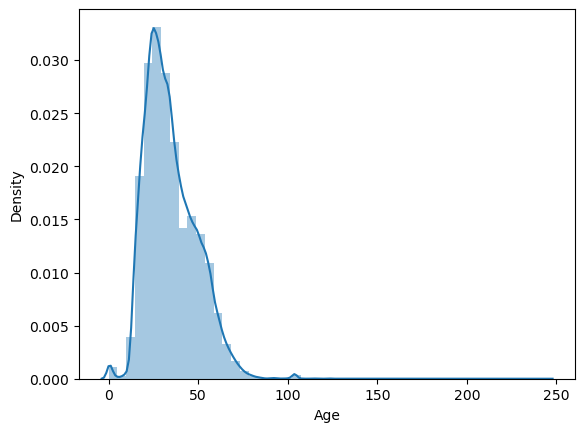

In [123]:
sns.distplot(users_df.Age)

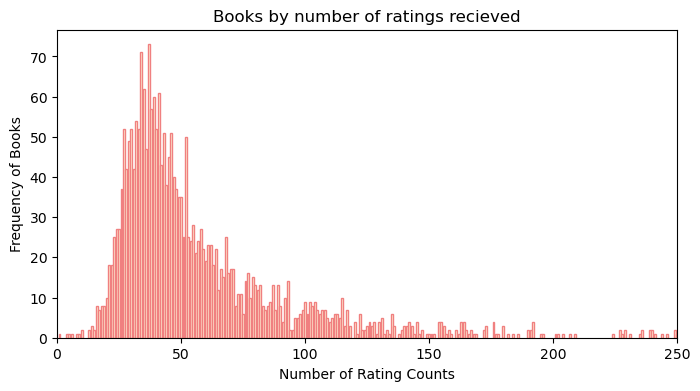

In [124]:
# Group the data by each book and counts how many ratings each book has recieved
book_rating_counts = final_rating.groupby('Book-Title')['Book-Rating'].count()

# Calculate how many books fall into each rating count category and then sorts these counts
rating_frequencies = book_rating_counts.value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(8, 4))
plt.bar(rating_frequencies[:500].index, rating_frequencies[:500].values, color='Cornsilk', edgecolor='LightCoral')

plt.xlim(0, 250)

# Adding titles and labels
plt.title('Books by number of ratings recieved')
plt.xlabel('Number of Rating Counts')
plt.ylabel('Frequency of Books')

# Display the plot
plt.show()

we can observe that around 25 books have received approximately 35 ratings each.

The majority of books fall within the range of 25 to 100 total ratings, indicating that most books have moderate engagement from users. 

Interestingly, there are very few books with rating counts exceeding 150, highlighting the rarity of highly rated books in our dataset. This insight will help us better understand the characteristics of our data as we move forward.

<Axes: xlabel='count', ylabel='Book-Rating'>

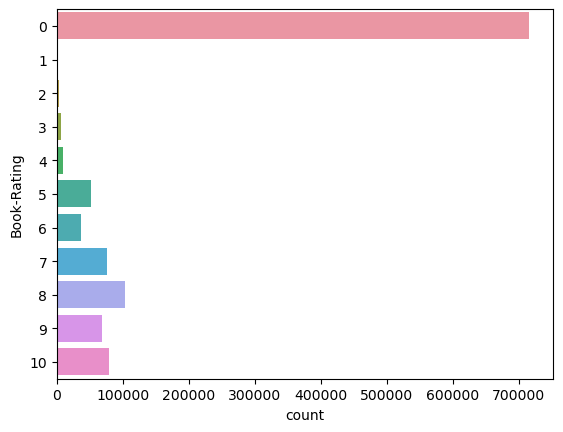

In [128]:


sns.countplot(y=ratings_df['Book-Rating'])

As we observe, more than 7 lakh ratings are having 0 rating which is 62 % of rating data.

which says that most users give no ratings and large propotinate of them give very low no of ratings.

<Axes: ylabel='Book-Rating'>

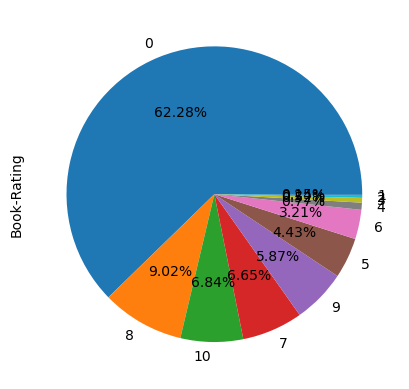

In [132]:
ratings_df['Book-Rating'].value_counts().plot(kind='pie',autopct = '%0.2f%%')

## COLLABORATIVE BASED MODEL BUILDING

In [135]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score=cosine_similarity(book_pivot_table)


In [177]:
def recommend_for(book_name):
    index=np.where(book_pivot_table.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:10]
    print(f"Books similar to '{book_name}':")


    data = []
    for i in similar_items:
        item = []
        temp_df = books_df[books_df['Book-Title'] == book_pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data


In [179]:
recommend_for('Animal Farm')

Books similar to 'Animal Farm':


[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Hamlet',
  'William Shakespeare',
  'http://images.amazon.com/images/P/067172262X.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['Women in His Life',
  'Barbara Taylor Bradford',
  'http://images.amazon.com/images/P/0345345738.01.MZZZZZZZ.jpg'],
 ['Shoeless Joe',
  'W. P. Kinsella',
  'http://images.amazon.com/images/P/0345342569.01.MZZZZZZZ.jpg'],
 ['The Tortilla Curtain',
  'T. Coraghessan Boyle',
  'http://images.amazon.com/images/P/0670856045.01.MZZZZZZZ.jpg'],
 ['Macbeth',
  'William Shakespeare',
  'http://images.amazon.com/images/P/0451521358.01.MZZZZZZZ.jpg'],
 ['Bell Jar',
  'Sylvia Plath',
  'http://images.amazon.com/images/P/0571081789.01.MZZZZZZZ.jpg'],
 ['stardust',
  'Neil Gaiman',
  'http://images.amazon.com/images/P/0060934719.01.MZZZZZZZ.jpg'],
 ['Before and After',
  'Rosellen Brown',
  'htt

## POPULARITY BASED RECOMMENDED SYSTEMS MODEL BUILDING

In [190]:
no_of_ratings_df = df.groupby("Book-Title").count()['Book-Rating'].reset_index()
no_of_ratings_df.rename(columns = {"Book-Rating" : "no_of_ratings"},inplace= True)
no_of_ratings_df

,Book-Title,no_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [196]:
avg_rating_df = df.groupby("Book-Title").mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns = {"Book-Rating" : "avg_rating"}, inplace =True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [216]:
popular_df = no_of_ratings_df.merge(avg_rating_df ,on = "Book-Title")
popular_df

,Book-Title,no_of_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [222]:
popular_df = popular_df[popular_df["no_of_ratings"]>=250].sort_values("avg_rating" , ascending = False).head(50)
popular_df

,Book-Title,no_of_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [230]:
popular_df.merge(books_df,on = "Book-Title").drop_duplicates("Book-Title")[['Book-Title','Book-Author','Image-URL-M','no_of_ratings','avg_rating']]

,Book-Title,Book-Author,Image-URL-M,no_of_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
